<a href="https://colab.research.google.com/github/MadsFolkmann/PredictWinner/blob/main/PredrictMatchWinner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score
from pickle import dump,load

In [338]:
dataFrame = pd.read_csv("/content/PremierLeague.csv")


In [339]:
dataFrame.head()

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,NaN,Arsenal,Coventry,0,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,1993-1994_Aston Villa_QPR,1993-1994,1,1993-08-14,NaN,Aston Villa,QPR,4,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,1993-1994_Chelsea_Blackburn,1993-1994,1,1993-08-14,NaN,Chelsea,Blackburn,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,1993-1994_Liverpool_Sheffield Weds,1993-1994,1,1993-08-14,NaN,Liverpool,Sheffield Weds,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
4,1993-1994_Man City_Leeds,1993-1994,1,1993-08-14,NaN,Man City,Leeds,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [340]:
dataFrame['SeasonStartYear'] = dataFrame['Season'].apply(lambda x: int(x.split('-')[0]))
data_pre_2019 = dataFrame[dataFrame['SeasonStartYear'] < 2019]
data_post_2019 = dataFrame[dataFrame['SeasonStartYear'] >= 2019]
print("Pre-2015 dataset size:", data_pre_2015.shape)
print("Post-2019 dataset size:", data_post_2019.shape)

Pre-2015 dataset size: (8360, 44)
Post-2019 dataset size: (2099, 44)


In [341]:
data_post_2019

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints,SeasonStartYear
9880,2019-2020_Liverpool_Norwich,2019-2020,1,2019-08-09,20:00,Liverpool,Norwich,4,1,H,...,1.14,8.75,19.83,1.45,3.11,1.41,2.92,3,0,2019
9881,2019-2020_West Ham_Man City,2019-2020,1,2019-08-10,12:30,West Ham,Man City,0,5,A,...,11.84,6.28,1.25,1.51,2.77,1.48,2.65,0,3,2019
9882,2019-2020_Bournemouth_Sheffield United,2019-2020,1,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,D,...,2.01,3.53,3.83,2.00,1.99,1.90,1.93,1,1,2019
9883,2019-2020_Burnley_Southampton,2019-2020,1,2019-08-10,15:00,Burnley,Southampton,3,0,H,...,2.68,3.22,2.78,2.20,1.78,2.12,1.73,3,0,2019
9884,2019-2020_Crystal Palace_Everton,2019-2020,1,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,...,3.13,3.27,2.40,2.25,1.74,2.18,1.70,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,2024-2025_Fulham_Arsenal,2024-2025,15,2024-12-08,14:00,Fulham,Arsenal,1,1,D,...,5.40,4.24,1.61,1.84,2.17,1.78,2.06,1,1,2024
11975,2024-2025_Ipswich_Bournemouth,2024-2025,15,2024-12-08,14:00,Ipswich,Bournemouth,1,2,A,...,3.57,3.73,2.02,1.75,2.22,1.72,2.16,0,3,2024
11976,2024-2025_Leicester_Brighton,2024-2025,15,2024-12-08,14:00,Leicester,Brighton,2,2,D,...,4.48,4.02,1.75,1.63,2.44,1.59,2.39,1,1,2024
11977,2024-2025_Tottenham_Chelsea,2024-2025,15,2024-12-08,16:30,Tottenham,Chelsea,3,4,A,...,3.21,4.04,2.07,1.36,3.45,1.35,3.26,0,3,2024


In [342]:
data_post_2019.columns

Index(['MatchID', 'Season', 'MatchWeek', 'Date', 'Time', 'HomeTeam',
       'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
       'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots',
       'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners',
       'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints',
       'SeasonStartYear'],
      dtype='object')

In [343]:
columns_to_remove = [ 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals',
       'HalfTimeResult', 'HomeTeamCorners',
       'AwayTeamCorners',
       'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam',
       'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals',
       'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals',
       'MarketAvgUnder2.5Goals','SeasonStartYear', 'MarketMaxHomeTeam', 'Date']

data_post_2019 = data_post_2019.drop(columns=columns_to_remove)

In [344]:
data_post_2019.columns

Index(['MatchID', 'Season', 'MatchWeek', 'Time', 'HomeTeam', 'AwayTeam',
       'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult',
       'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
       'AwayTeamShotsOnTarget', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'HomeTeamPoints',
       'AwayTeamPoints'],
      dtype='object')

In [345]:
data_post_2019.dropna(inplace=True)

In [346]:
data_for_x = data_post_2019.drop(columns=['FullTimeResult'])
X = data_for_x.iloc[ : , 2: ]
X

,MatchWeek,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,Referee,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,...,AwayTeamYellowCards,HomeTeamRedCards,AwayTeamRedCards,B365HomeTeam,B365Draw,B365AwayTeam,B365Over2.5Goals,B365Under2.5Goals,HomeTeamPoints,AwayTeamPoints
9880,1,20:00,Liverpool,Norwich,4,1,M Oliver,15.0,12.0,7.0,...,2.0,0.0,0.0,1.14,10.00,19.00,1.40,3.00,3,0
9881,1,12:30,West Ham,Man City,0,5,M Dean,5.0,14.0,3.0,...,2.0,0.0,0.0,12.00,6.50,1.22,1.44,2.75,0,3
9882,1,15:00,Bournemouth,Sheffield United,1,1,K Friend,13.0,8.0,3.0,...,1.0,0.0,0.0,1.95,3.60,3.60,1.90,1.90,1,1
9883,1,15:00,Burnley,Southampton,3,0,G Scott,10.0,11.0,4.0,...,0.0,0.0,0.0,2.62,3.20,2.75,2.10,1.72,3,0
9884,1,15:00,Crystal Palace,Everton,0,0,J Moss,6.0,10.0,2.0,...,1.0,0.0,1.0,3.00,3.25,2.37,2.20,1.66,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,15,14:00,Fulham,Arsenal,1,1,C Kavanagh,2.0,12.0,2.0,...,2.0,0.0,0.0,5.00,4.33,1.60,1.80,2.00,1,1
11975,15,14:00,Ipswich,Bournemouth,1,2,M Salisbury,18.0,22.0,5.0,...,1.0,0.0,0.0,3.50,3.75,2.00,1.73,2.10,0,3
11976,15,14:00,Leicester,Brighton,2,2,S Attwell,10.0,16.0,3.0,...,2.0,0.0,0.0,4.50,3.80,1.73,1.57,2.38,1,1
11977,15,16:30,Tottenham,Chelsea,3,4,A Taylor,13.0,17.0,5.0,...,2.0,0.0,0.0,3.40,3.90,2.00,1.36,3.20,0,3


In [347]:
y = data_post_2019['FullTimeResult']
y

,FullTimeResult
9880,H
9881,A
9882,D
9883,H
9884,D
...,...
11974,D
11975,A
11976,D
11977,A


In [348]:
X = pd.get_dummies(X)
X

,MatchWeek,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamFouls,AwayTeamFouls,HomeTeamYellowCards,...,Referee_R Welch,Referee_S Allison,Referee_S Attwell,Referee_S Barrott,Referee_S Hooper,Referee_S Scott,Referee_S Singh,Referee_T Bramall,Referee_T Harrington,Referee_T Robinson
9880,1,4,1,15.0,12.0,7.0,5.0,9.0,9.0,0.0,...,False,False,False,False,False,False,False,False,False,False
9881,1,0,5,5.0,14.0,3.0,9.0,6.0,13.0,2.0,...,False,False,False,False,False,False,False,False,False,False
9882,1,1,1,13.0,8.0,3.0,3.0,10.0,19.0,2.0,...,False,False,False,False,False,False,False,False,False,False
9883,1,3,0,10.0,11.0,4.0,3.0,6.0,12.0,0.0,...,False,False,False,False,False,False,False,False,False,False
9884,1,0,0,6.0,10.0,2.0,3.0,16.0,14.0,2.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11974,15,1,1,2.0,12.0,2.0,4.0,10.0,9.0,4.0,...,False,False,False,False,False,False,False,False,False,False
11975,15,1,2,18.0,22.0,5.0,6.0,9.0,13.0,2.0,...,False,False,False,False,False,False,False,False,False,False
11976,15,2,2,10.0,16.0,3.0,7.0,9.0,10.0,1.0,...,False,False,True,False,False,False,False,False,False,False
11977,15,3,4,13.0,17.0,5.0,8.0,17.0,11.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [357]:
X.columns[ 0: 99]

Index(['MatchWeek', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals',
       'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
       'AwayTeamShotsOnTarget', 'HomeTeamFouls', 'AwayTeamFouls',
       'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards',
       'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam',
       'B365Over2.5Goals', 'B365Under2.5Goals', 'HomeTeamPoints',
       'AwayTeamPoints', 'Time_12:00', 'Time_12:30', 'Time_13:00',
       'Time_13:30', 'Time_14:00', 'Time_14:05', 'Time_14:15', 'Time_14:30',
       'Time_15:00', 'Time_15:30', 'Time_15:45', 'Time_16:00', 'Time_16:15',
       'Time_16:30', 'Time_17:15', 'Time_17:30', 'Time_17:45', 'Time_18:00',
       'Time_19:00', 'Time_19:15', 'Time_19:30', 'Time_19:45', 'Time_20:00',
       'Time_20:15', 'HomeTeam_Arsenal', 'HomeTeam_Aston Villa',
       'HomeTeam_Bournemouth', 'HomeTeam_Brentford', 'HomeTeam_Brighton',
       'HomeTeam_Burnley', 'HomeTeam_Chelsea', 'HomeTeam_Crystal Palace',


In [323]:
y = pd.get_dummies(y)
y

,A,D,H
9880,False,False,True
9881,True,False,False
9882,False,True,False
9883,False,False,True
9884,False,True,False
...,...,...,...
11974,False,True,False
11975,True,False,False
11976,False,True,False
11977,True,False,False


In [324]:
X = X.values
y = y.values

In [325]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [326]:
dump(scaler, open('scaler.pkl', 'wb'))

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 )

In [330]:
model = Sequential()
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='softmax'))

adam = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [331]:
model.fit(X_train,y_train,epochs=100, verbose=1)

Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4334 - loss: 1.1404
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4183 - loss: 1.1408
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4626 - loss: 1.0992
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4842 - loss: 1.1001
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4821 - loss: 1.0819
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 1.0842
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4971 - loss: 1.0796
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5004 - loss: 1.0892
Epoch 9/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5525 - loss: 1.0327
Epoch 10/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5437 - loss: 1.0464
Epoch 11/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5468 - loss: 1.0397
Epoch 12/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

<Axes: >

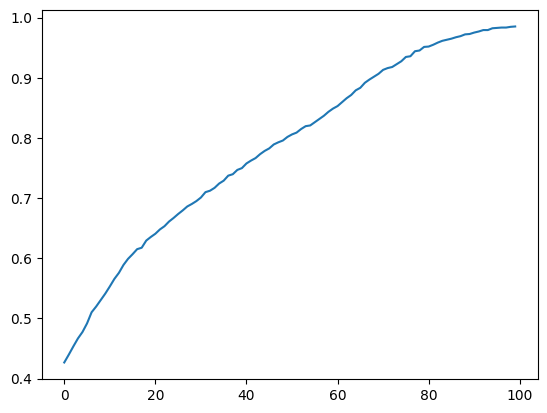

In [332]:
accuracy = model.history.history['accuracy']
sns.lineplot(x=range(len(accuracy)),y=accuracy)

<Axes: >

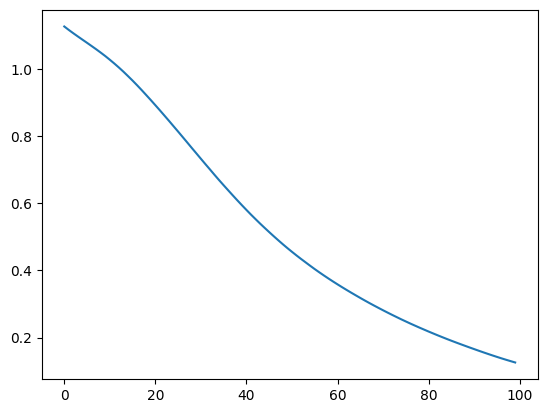

In [333]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)

In [334]:
model.evaluate(X_test,y_test,verbose=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9446 - loss: 0.1984  


[0.19859564304351807, 0.9428571462631226]